In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Multi linear regression model on startup data

In [46]:
df=pd.read_csv(r"D:\Data Science\Assignments\Assignment #5 Multi Linear Regression\50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [48]:
df.rename(columns={'R&D Spend': 'RnD','Marketing Spend':'Marketing','New York':'NewYork'},inplace=True)

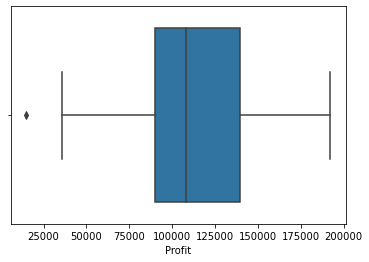

In [49]:
sns.boxplot(df["Profit"])

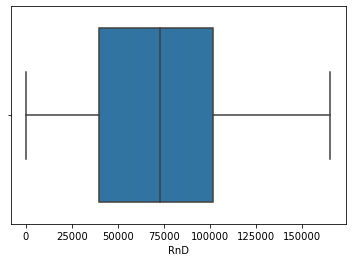

In [51]:
sns.boxplot(df["RnD"])

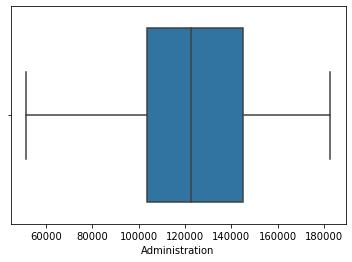

In [52]:
sns.boxplot(df["Administration"])

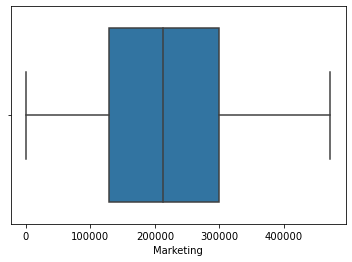

In [53]:
sns.boxplot(df["Marketing"])

In [55]:
dum= pd.get_dummies(df['State'])

In [57]:
df= pd.concat([df,dum],axis=1)
df= df.drop(["State"],axis=1)

In [58]:
df= df.iloc[:,[3,0,1,2,4,5,6]]

# PAIR PLOT

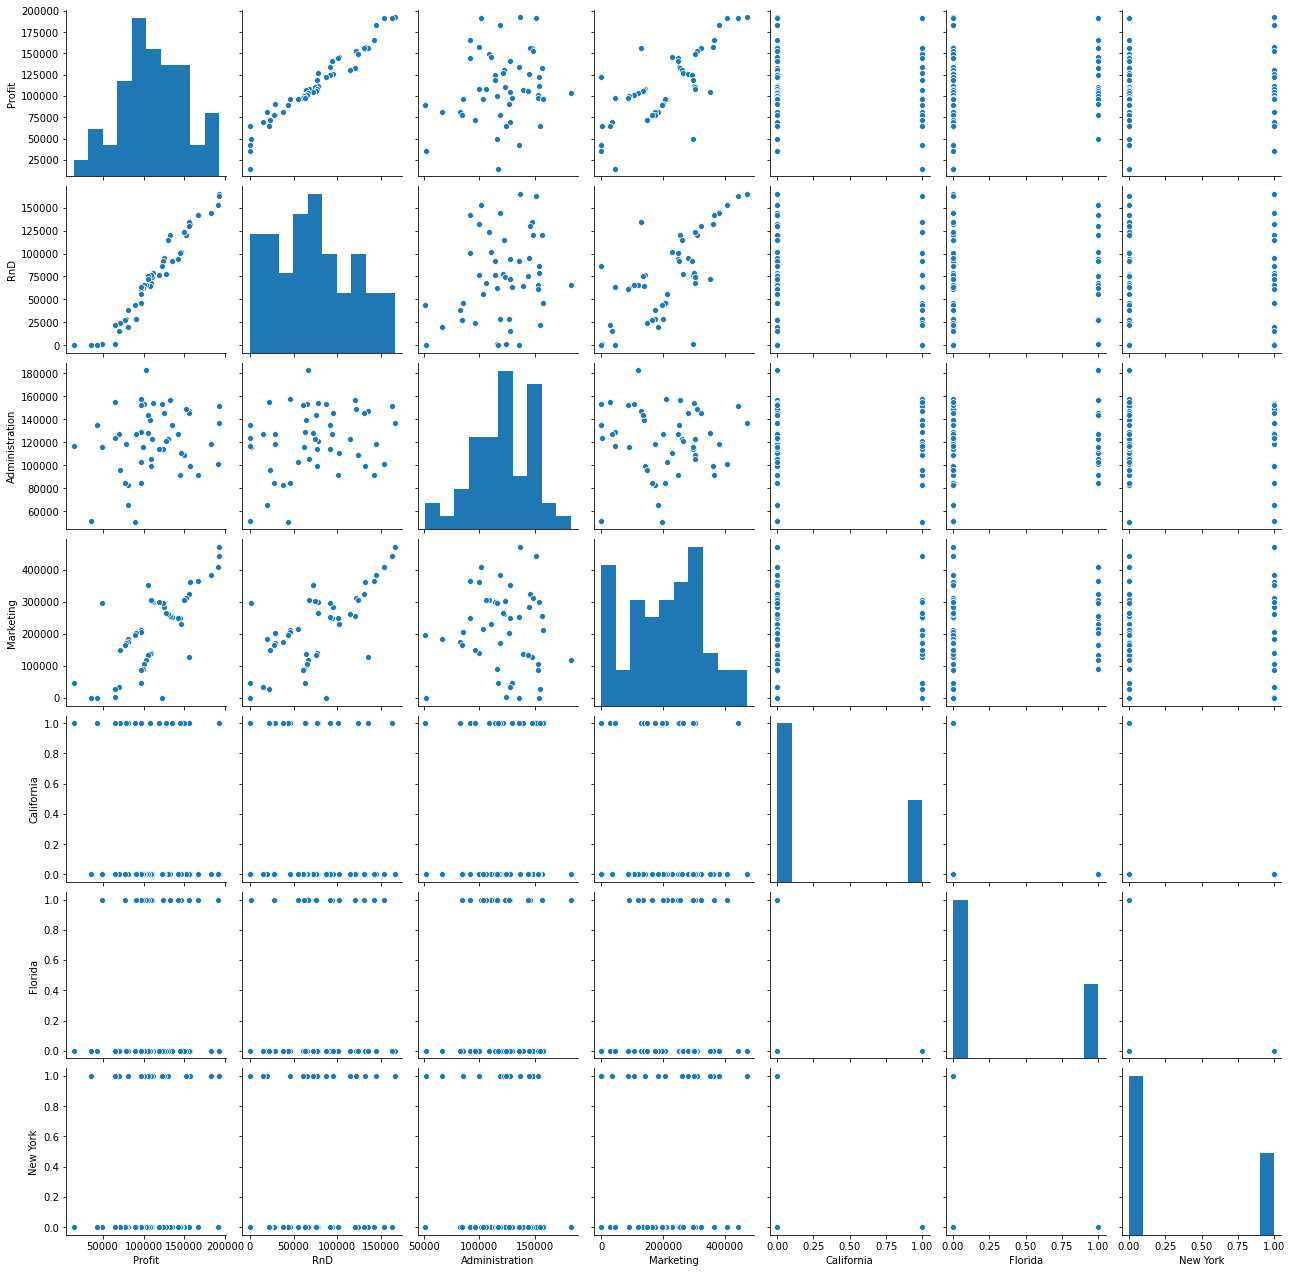

In [59]:
sns.pairplot(df)

# Correlation Matrix

In [60]:
cor_values= df.corr()
cor_values

,Profit,RnD,Administration,Marketing,California,Florida,New York
Profit,1.000000,0.972900,0.200717,0.747766,-0.145837,0.116244,0.031368
RnD,0.972900,1.000000,0.241955,0.724248,-0.143165,0.105711,0.039068
Administration,0.200717,0.241955,1.000000,-0.032154,-0.015478,0.010493,0.005145
Marketing,0.747766,0.724248,-0.032154,1.000000,-0.168875,0.205685,-0.033670
California,-0.145837,-0.143165,-0.015478,-0.168875,1.000000,-0.492366,-0.515152
Florida,0.116244,0.105711,0.010493,0.205685,-0.492366,1.000000,-0.492366
New York,0.031368,0.039068,0.005145,-0.033670,-0.515152,-0.492366,1.000000


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
df.rename(columns={'R&D Spend': 'RnD','Marketing Spend':'Marketing','New York':'NewYork'},inplace=True)

In [63]:
train_data,test_data= train_test_split(df)

In [64]:
import statsmodels.formula.api as smf

In [65]:
train_data.rename(columns={'R&D Spend': 'RnD','Marketing Spend':'Marketing','New York':'NewYork'},inplace=True)
test_data.rename(columns={'R&D Spend': 'RnD','Marketing Spend':'Marketing','New York':'NewYork'},inplace=True)

E:\Anaconda\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [66]:
train_data.to_csv("train_data.csv",encoding="utf-8")
test_data.to_csv("test_data.csv",encoding="utf-8")

In [67]:
model1= smf.ols("Profit~RnD+Administration+Marketing+California+Florida+NewYork",data=train_data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     130.6
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           7.18e-20
Time:                        12:38:31   Log-Likelihood:                -387.19
No. Observations:                  37   AIC:                             786.4
Df Residuals:                      31   BIC:                             796.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.333e+04   5869.099      5.679      0.000    2.14e+04    4.53e+04
RnD                0.8577      0.051     16.936      0.000       0.754       0.961
Administration    -0.0240      0.061     -0.394      0.696      -0.148       0.100
Marketing          0.0267      0.018      1.499      0.144      -0.010       0.063
California       1.22e+04   2894.665      4.216      0.000    6299.873    1.81e+04
Florida         1.164e+04   2915.564      3.993      0.000    5696.238    1.76e+04
NewYork         9487.3811   2973.047      3.191      0.003    3423.812    1.56e+04
==============================================================================
Omnibus:                       14.427   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.592
Skew:                          -1.203   Prob(JB):                     0.000250
Kurtosis:                       5.231   Cond. No.                     1.47e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.38e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [68]:
model1_ad= smf.ols("Profit~Administration", data= train_data).fit()
model1_ad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     2.460
Date:                Mon, 02 Aug 2021   Prob (F-statistic):              0.126
Time:                        12:39:01   Log-Likelihood:                -443.17
No. Observations:                  37   AIC:                             890.3
Df Residuals:                      35   BIC:                             893.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6.642e+04   3.09e+04      2.153      0.038    3786.222    1.29e+05
Administration     0.3809      0.243      1.568      0.126      -0.112       0.874
==============================================================================
Omnibus:                        0.368   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.832   Jarque-Bera (JB):                0.055
Skew:                          -0.090   Prob(JB):                        0.973
Kurtosis:                       3.053   Cond. No.                     6.02e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
model1_ma = smf.ols("Profit~Marketing", data= train_data).fit()
model1_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     31.46
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           2.53e-06
Time:                        12:39:18   Log-Likelihood:                -432.57
No. Observations:                  37   AIC:                             869.1
Df Residuals:                      35   BIC:                             872.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    6.27e+04   1.03e+04      6.073      0.000    4.17e+04    8.37e+04
Marketing      0.2340      0.042      5.609      0.000       0.149       0.319
==============================================================================
Omnibus:                        2.986   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                1.770
Skew:                          -0.391   Prob(JB):                        0.413
Kurtosis:                       3.733   Cond. No.                     5.23e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
model1_com= smf.ols("Profit~Administration+Marketing", data= train_data).fit()
model1_com.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     19.08
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           2.78e-06
Time:                        12:40:02   Log-Likelihood:                -430.51
No. Observations:                  37   AIC:                             867.0
Df Residuals:                      34   BIC:                             871.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.974e+04   2.36e+04      0.835      0.410   -2.83e+04    6.78e+04
Administration     0.3502      0.175      2.001      0.053      -0.006       0.706
Marketing          0.2316      0.040      5.781      0.000       0.150       0.313
==============================================================================
Omnibus:                        3.661   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.160   Jarque-Bera (JB):                2.344
Skew:                          -0.505   Prob(JB):                        0.310
Kurtosis:                       3.707   Cond. No.                     1.37e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

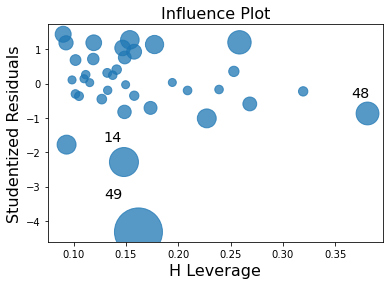

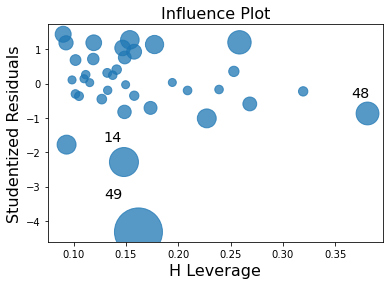

In [72]:
import statsmodels.api as sm
sm.graphics.influence_plot(model1)

In [74]:
train_data1= train_data.drop(train_data.index[[4]], axis=0)

In [75]:
model2= smf.ols("Profit~RnD+Administration+Marketing+California+Florida+NewYork", data= train_data1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     132.6
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           1.63e-19
Time:                        12:41:24   Log-Likelihood:                -376.37
No. Observations:                  36   AIC:                             764.7
Df Residuals:                      30   BIC:                             774.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.309e+04   5831.059      5.674      0.000    2.12e+04     4.5e+04
RnD                0.8417      0.052     16.180      0.000       0.735       0.948
Administration    -0.0309      0.061     -0.509      0.614      -0.155       0.093
Marketing          0.0363      0.019      1.871      0.071      -0.003       0.076
California       1.25e+04   2884.528      4.333      0.000    6606.685    1.84e+04
Florida         1.173e+04   2895.747      4.050      0.000    5813.741    1.76e+04
NewYork         8862.1506   2997.442      2.957      0.006    2740.557     1.5e+04
==============================================================================
Omnibus:                       14.113   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.973
Skew:                          -1.195   Prob(JB):                     0.000340
Kurtosis:                       5.222   Cond. No.                     4.40e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.54e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [76]:
train_data2 = train_data.drop(train_data.index[[4,24]],axis=0)
model3 = smf.ols("Profit~RnD+Administration+Marketing+California+Florida+NewYork", data= train_data2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     133.2
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           4.37e-19
Time:                        12:41:46   Log-Likelihood:                -365.67
No. Observations:                  35   AIC:                             743.3
Df Residuals:                      29   BIC:                             752.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        3.45e+04   5943.994      5.805      0.000    2.23e+04    4.67e+04
RnD                0.8559      0.053     16.044      0.000       0.747       0.965
Administration    -0.0511      0.063     -0.809      0.425      -0.180       0.078
Marketing          0.0327      0.020      1.669      0.106      -0.007       0.073
California      1.236e+04   2875.318      4.299      0.000    6480.319    1.82e+04
Florida         1.254e+04   2973.902      4.216      0.000    6456.314    1.86e+04
NewYork         9603.9539   3058.166      3.140      0.004    3349.302    1.59e+04
==============================================================================
Omnibus:                       12.397   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.605
Skew:                          -1.144   Prob(JB):                      0.00183
Kurtosis:                       4.847   Cond. No.                     2.55e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.5e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [77]:
train_data2 = train_data.drop(train_data.index[[4,24]],axis=0)
model3 = smf.ols("Profit~RnD+Administration+Marketing+California+Florida+NewYork", data= train_data2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     133.2
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           4.37e-19
Time:                        12:41:59   Log-Likelihood:                -365.67
No. Observations:                  35   AIC:                             743.3
Df Residuals:                      29   BIC:                             752.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        3.45e+04   5943.994      5.805      0.000    2.23e+04    4.67e+04
RnD                0.8559      0.053     16.044      0.000       0.747       0.965
Administration    -0.0511      0.063     -0.809      0.425      -0.180       0.078
Marketing          0.0327      0.020      1.669      0.106      -0.007       0.073
California      1.236e+04   2875.318      4.299      0.000    6480.319    1.82e+04
Florida         1.254e+04   2973.902      4.216      0.000    6456.314    1.86e+04
NewYork         9603.9539   3058.166      3.140      0.004    3349.302    1.59e+04
==============================================================================
Omnibus:                       12.397   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.605
Skew:                          -1.144   Prob(JB):                      0.00183
Kurtosis:                       4.847   Cond. No.                     2.55e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.5e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [78]:
rsq_rnd = smf.ols("RnD~Administration+Marketing+California+Florida+NewYork", data= train_data2).fit().rsquared
ViF_rnd = 1/(1-rsq_rnd)
ViF_rnd

2.316575909384006

In [79]:
rsq_adm = smf.ols("Administration~RnD+Marketing+California+Florida+NewYork", data=train_data2).fit().rsquared
ViF_adm = 1/(1-rsq_adm)
ViF_adm

1.1652625471175675

In [80]:
rsq_mar = smf.ols("Marketing ~ RnD+Administration+California+Florida+NewYork", data= train_data2).fit().rsquared
ViF_mar = 1/(1-rsq_mar)
ViF_mar

2.097399549902168

All VIF values are below 10 so there is no dependency among input variables

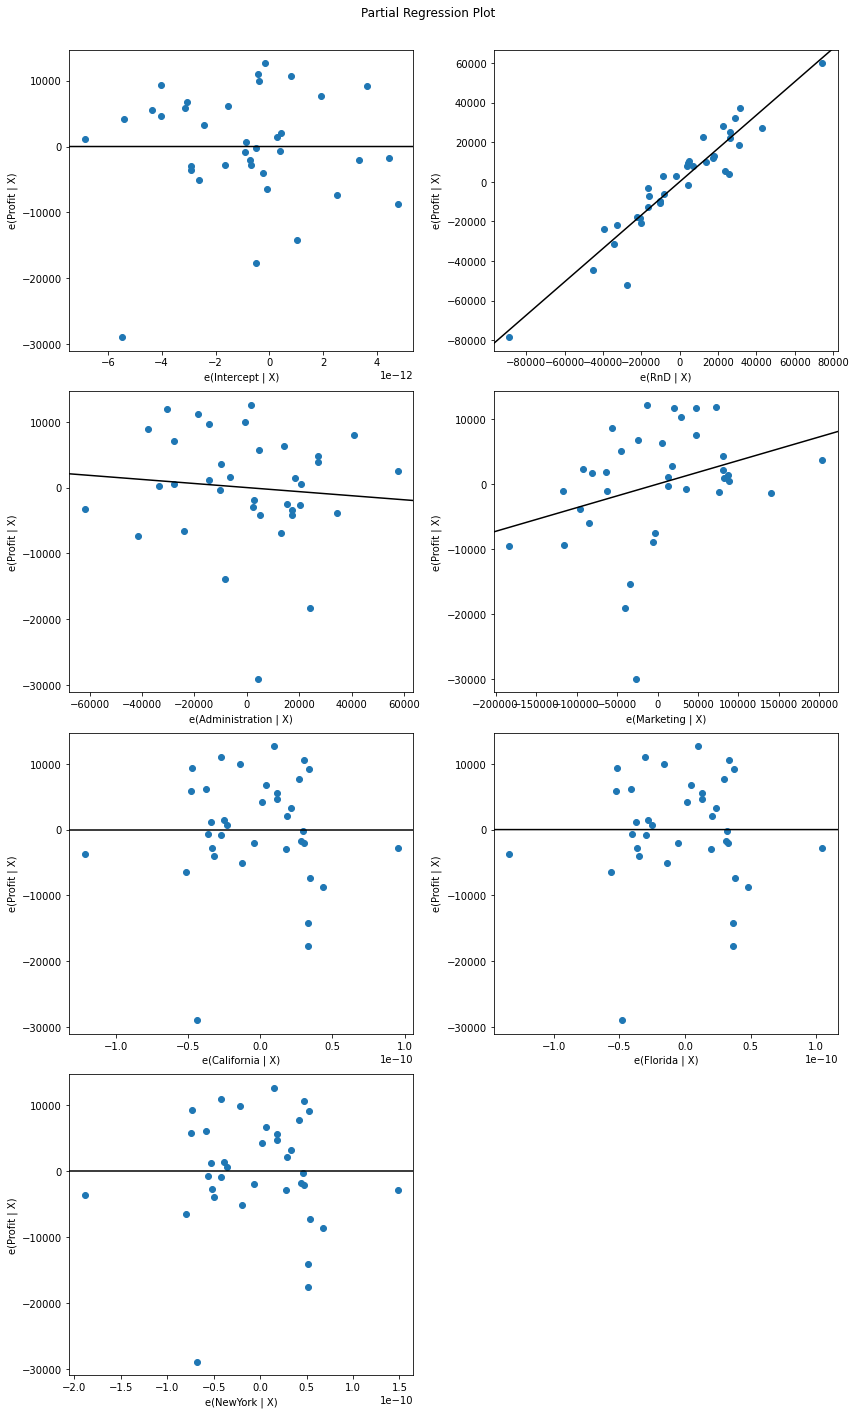

In [81]:
fig=plt.figure(figsize=(12,20))
fig=sm.graphics.plot_partregress_grid(model2,fig=fig)
plt.show()

In [82]:
model3= smf.ols("Profit~RnD+Marketing+California+Florida+NewYork",data = train_data2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     168.3
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           4.33e-20
Time:                        12:44:34   Log-Likelihood:                -366.06
No. Observations:                  35   AIC:                             742.1
Df Residuals:                      30   BIC:                             749.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.02e+04   2636.856     11.452      0.000    2.48e+04    3.56e+04
RnD            0.8403      0.049     16.994      0.000       0.739       0.941
Marketing      0.0358      0.019      1.877      0.070      -0.003       0.075
California  1.101e+04   2323.800      4.736      0.000    6259.822    1.58e+04
Florida     1.106e+04   2334.748      4.738      0.000    6293.658    1.58e+04
NewYork     8130.9266   2443.396      3.328      0.002    3140.845    1.31e+04
==============================================================================
Omnibus:                       12.622   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.350
Skew:                          -1.118   Prob(JB):                      0.00126
Kurtosis:                       5.039   Cond. No.                     2.56e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.76e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [83]:
finalmodel= smf.ols("Profit~RnD+Marketing+California+Florida+NewYork",data = train_data2).fit()
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     168.3
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           4.33e-20
Time:                        12:44:54   Log-Likelihood:                -366.06
No. Observations:                  35   AIC:                             742.1
Df Residuals:                      30   BIC:                             749.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.02e+04   2636.856     11.452      0.000    2.48e+04    3.56e+04
RnD            0.8403      0.049     16.994      0.000       0.739       0.941
Marketing      0.0358      0.019      1.877      0.070      -0.003       0.075
California  1.101e+04   2323.800      4.736      0.000    6259.822    1.58e+04
Florida     1.106e+04   2334.748      4.738      0.000    6293.658    1.58e+04
NewYork     8130.9266   2443.396      3.328      0.002    3140.845    1.31e+04
==============================================================================
Omnibus:                       12.622   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.350
Skew:                          -1.118   Prob(JB):                      0.00126
Kurtosis:                       5.039   Cond. No.                     2.56e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.76e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Testing the Model

In [84]:
train_pred = finalmodel.predict(train_data2)

In [85]:
train_res= train_data2["Profit"]-train_pred

In [86]:
train_rmse = np.sqrt(np.mean(train_res*train_res))
train_rmse

8433.795451453096

In [87]:
test_pred = finalmodel.predict(test_data)

In [88]:
test_res= test_data["Profit"]- test_pred

In [89]:
test_rmse = np.sqrt(np.mean(test_res*test_res))
test_rmse

12085.049717667802

In [92]:
df1= df.drop(df.index[[4,24]],axis=0)
bestmodel= smf.ols("Profit~RnD+Marketing+California+Florida+NewYork",data =df1).fit()
bestmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     200.4
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           3.35e-27
Time:                        12:54:56   Log-Likelihood:                -505.22
No. Observations:                  48   AIC:                             1020.
Df Residuals:                      43   BIC:                             1030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.525e+04   2158.528     16.332      0.000    3.09e+04    3.96e+04
RnD            0.8017      0.044     18.327      0.000       0.713       0.890
Marketing      0.0290      0.017      1.750      0.087      -0.004       0.062
California  1.153e+04   1959.390      5.886      0.000    7581.153    1.55e+04
Florida     1.199e+04   2231.189      5.376      0.000    7495.179    1.65e+04
NewYork     1.172e+04   2091.061      5.607      0.000    7507.870    1.59e+04
==============================================================================
Omnibus:                       14.156   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.900
Skew:                          -0.965   Prob(JB):                     7.87e-05
Kurtosis:                       5.392   Cond. No.                     1.20e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.15e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [94]:
bestmodel_pred = bestmodel.predict(df1)

Text(0, 0.5, 'Fitted values')

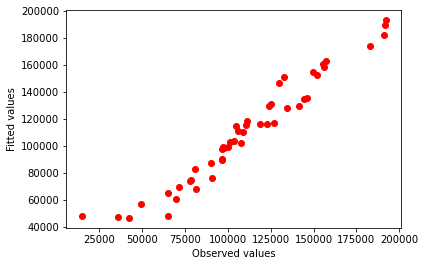

In [95]:
plt.scatter(df1.Profit,bestmodel_pred,c='r');plt.xlabel("Observed values");plt.ylabel("Fitted values")

Text(0, 0.5, 'Residuals')

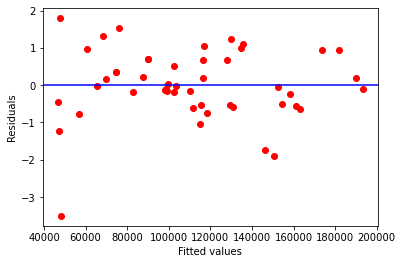

In [96]:
plt.scatter(bestmodel_pred,bestmodel.resid_pearson, c='r');plt.axhline(y=0,color='blue');plt.xlabel("Fitted values");plt.ylabel("Residuals")

(array([ 1.,  0.,  0.,  2.,  2., 10., 15.,  8.,  7.,  3.]),
 array([-3.50866306, -2.97830915, -2.44795525, -1.91760135, -1.38724745,
        -0.85689354, -0.32653964,  0.20381426,  0.73416816,  1.26452207,
         1.79487597]),
 <a list of 10 Patch objects>)

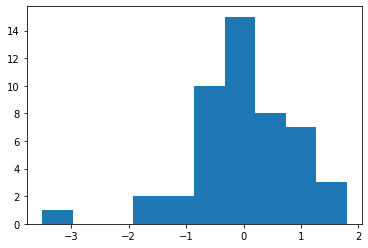

In [97]:
plt.hist(bestmodel.resid_pearson)

# Multi linear Regression Model on Toyota Dataset

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
df2=pd.read_csv("D:\Data Science\Assignments\Assignment #5 Multi Linear Regression\ToyotaCorolla.csv",engine='python')
df2.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [111]:
df2= df2.iloc[:,[2,3,6,8,12,13,15,16,17]]
df2.rename(columns={"Age_08_04":"Age"},inplace=True)

In [113]:
df2.describe()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


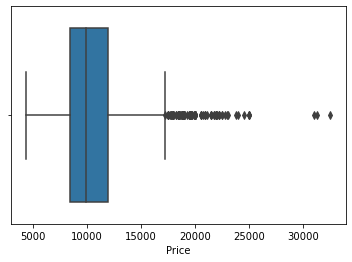

In [114]:
sns.boxplot(df2["Price"])

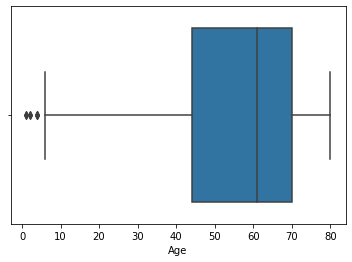

In [115]:
sns.boxplot(df2["Age"])

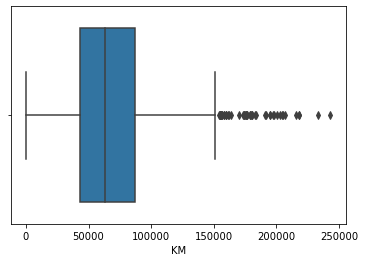

In [116]:
sns.boxplot(df2["KM"])

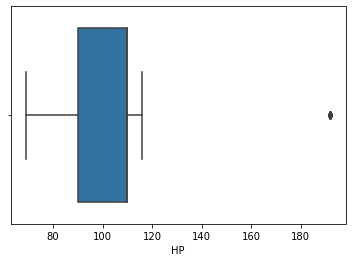

In [117]:
sns.boxplot(df2["HP"])

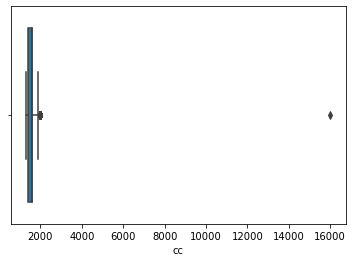

In [118]:
sns.boxplot(df2["cc"])

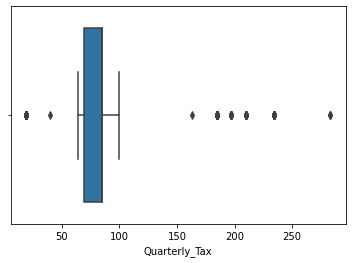

In [119]:
sns.boxplot(df2["Quarterly_Tax"])

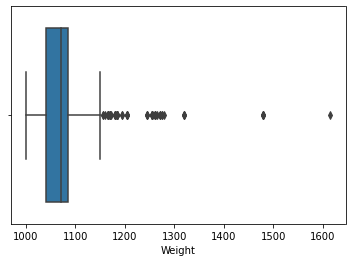

In [120]:
sns.boxplot(df2["Weight"])

In [122]:
import statsmodels.api as sm

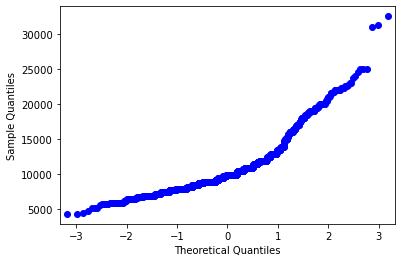

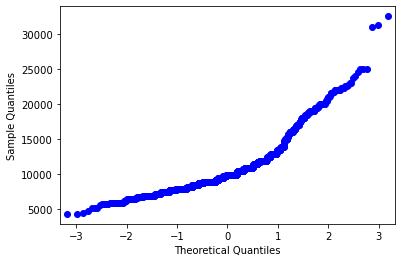

In [123]:
sm.graphics.qqplot(df2["Price"])

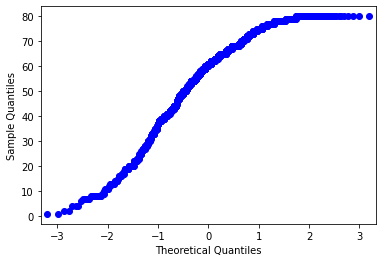

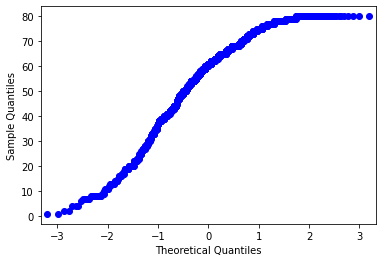

In [124]:
sm.graphics.qqplot(df2["Age"])

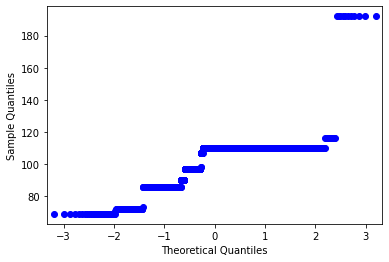

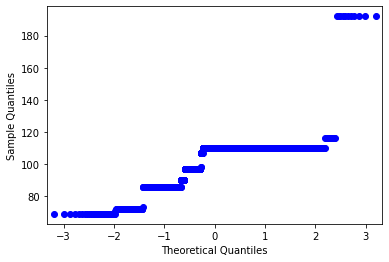

In [125]:
sm.graphics.qqplot(df2["HP"])

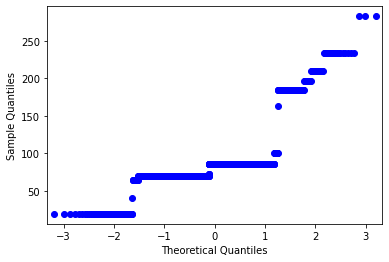

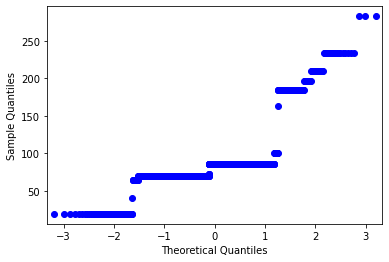

In [126]:
sm.graphics.qqplot(df2["Quarterly_Tax"])

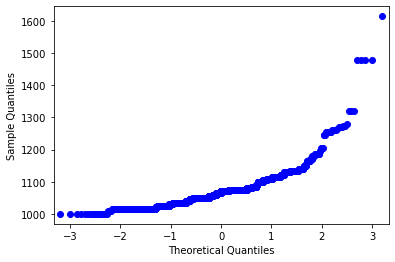

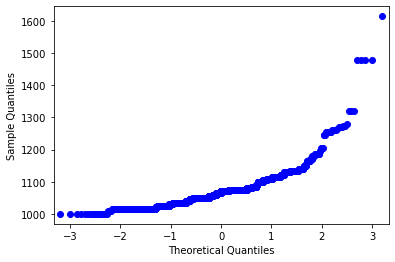

In [127]:
sm.graphics.qqplot(df2["Weight"])

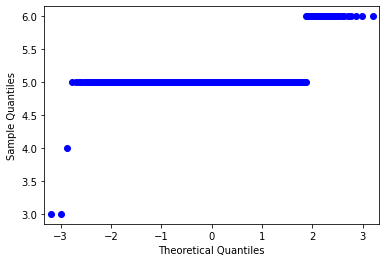

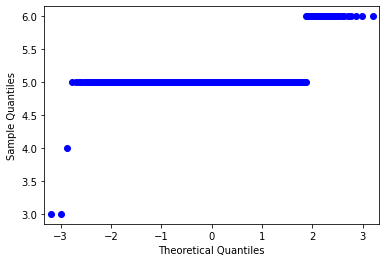

In [128]:
sm.graphics.qqplot(df2["Gears"])

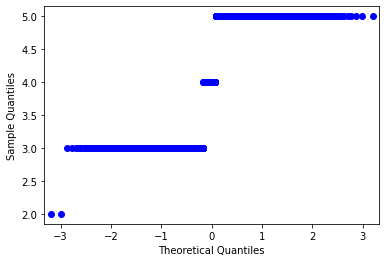

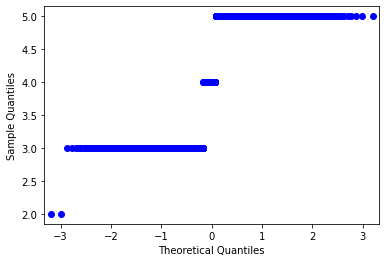

In [129]:
sm.graphics.qqplot(df2["Doors"])

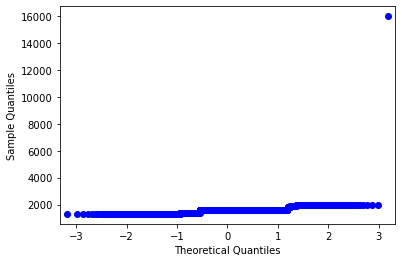

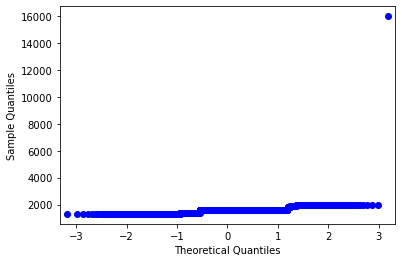

In [130]:
sm.graphics.qqplot(df2["cc"])

(array([110., 706., 343., 114.,  75.,  59.,  22.,   4.,   0.,   3.]),
 array([ 4350.,  7165.,  9980., 12795., 15610., 18425., 21240., 24055.,
        26870., 29685., 32500.]),
 <a list of 10 Patch objects>)

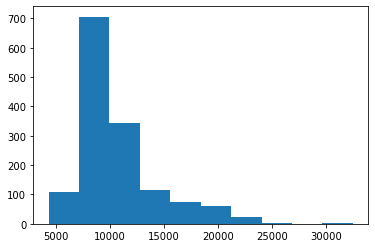

In [131]:
plt.hist(df2["Price"])

(array([ 24.,  36.,  62.,  64., 108., 127., 182., 247., 287., 299.]),
 array([ 1. ,  8.9, 16.8, 24.7, 32.6, 40.5, 48.4, 56.3, 64.2, 72.1, 80. ]),
 <a list of 10 Patch objects>)

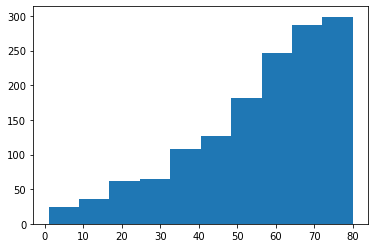

In [132]:
plt.hist(df2["Age"])

(array([109., 285., 166., 865.,   0.,   0.,   0.,   0.,   0.,  11.]),
 array([ 69. ,  81.3,  93.6, 105.9, 118.2, 130.5, 142.8, 155.1, 167.4,
        179.7, 192. ]),
 <a list of 10 Patch objects>)

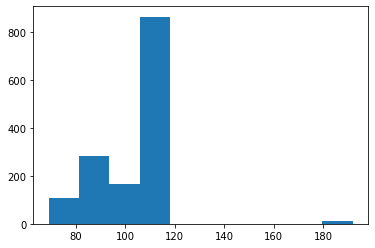

In [133]:
plt.hist(df2["HP"])

(array([ 73., 577., 616.,  19.,   0.,   1., 110.,  18.,  19.,   3.]),
 array([ 19. ,  45.4,  71.8,  98.2, 124.6, 151. , 177.4, 203.8, 230.2,
        256.6, 283. ]),
 <a list of 10 Patch objects>)

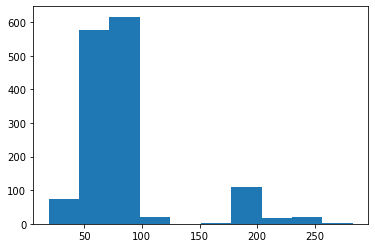

In [134]:
plt.hist(df2["Quarterly_Tax"])

(array([664., 620., 107.,  18.,  19.,   3.,   0.,   4.,   0.,   1.]),
 array([1000. , 1061.5, 1123. , 1184.5, 1246. , 1307.5, 1369. , 1430.5,
        1492. , 1553.5, 1615. ]),
 <a list of 10 Patch objects>)

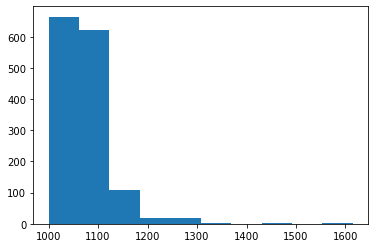

In [135]:
plt.hist(df2["Weight"])

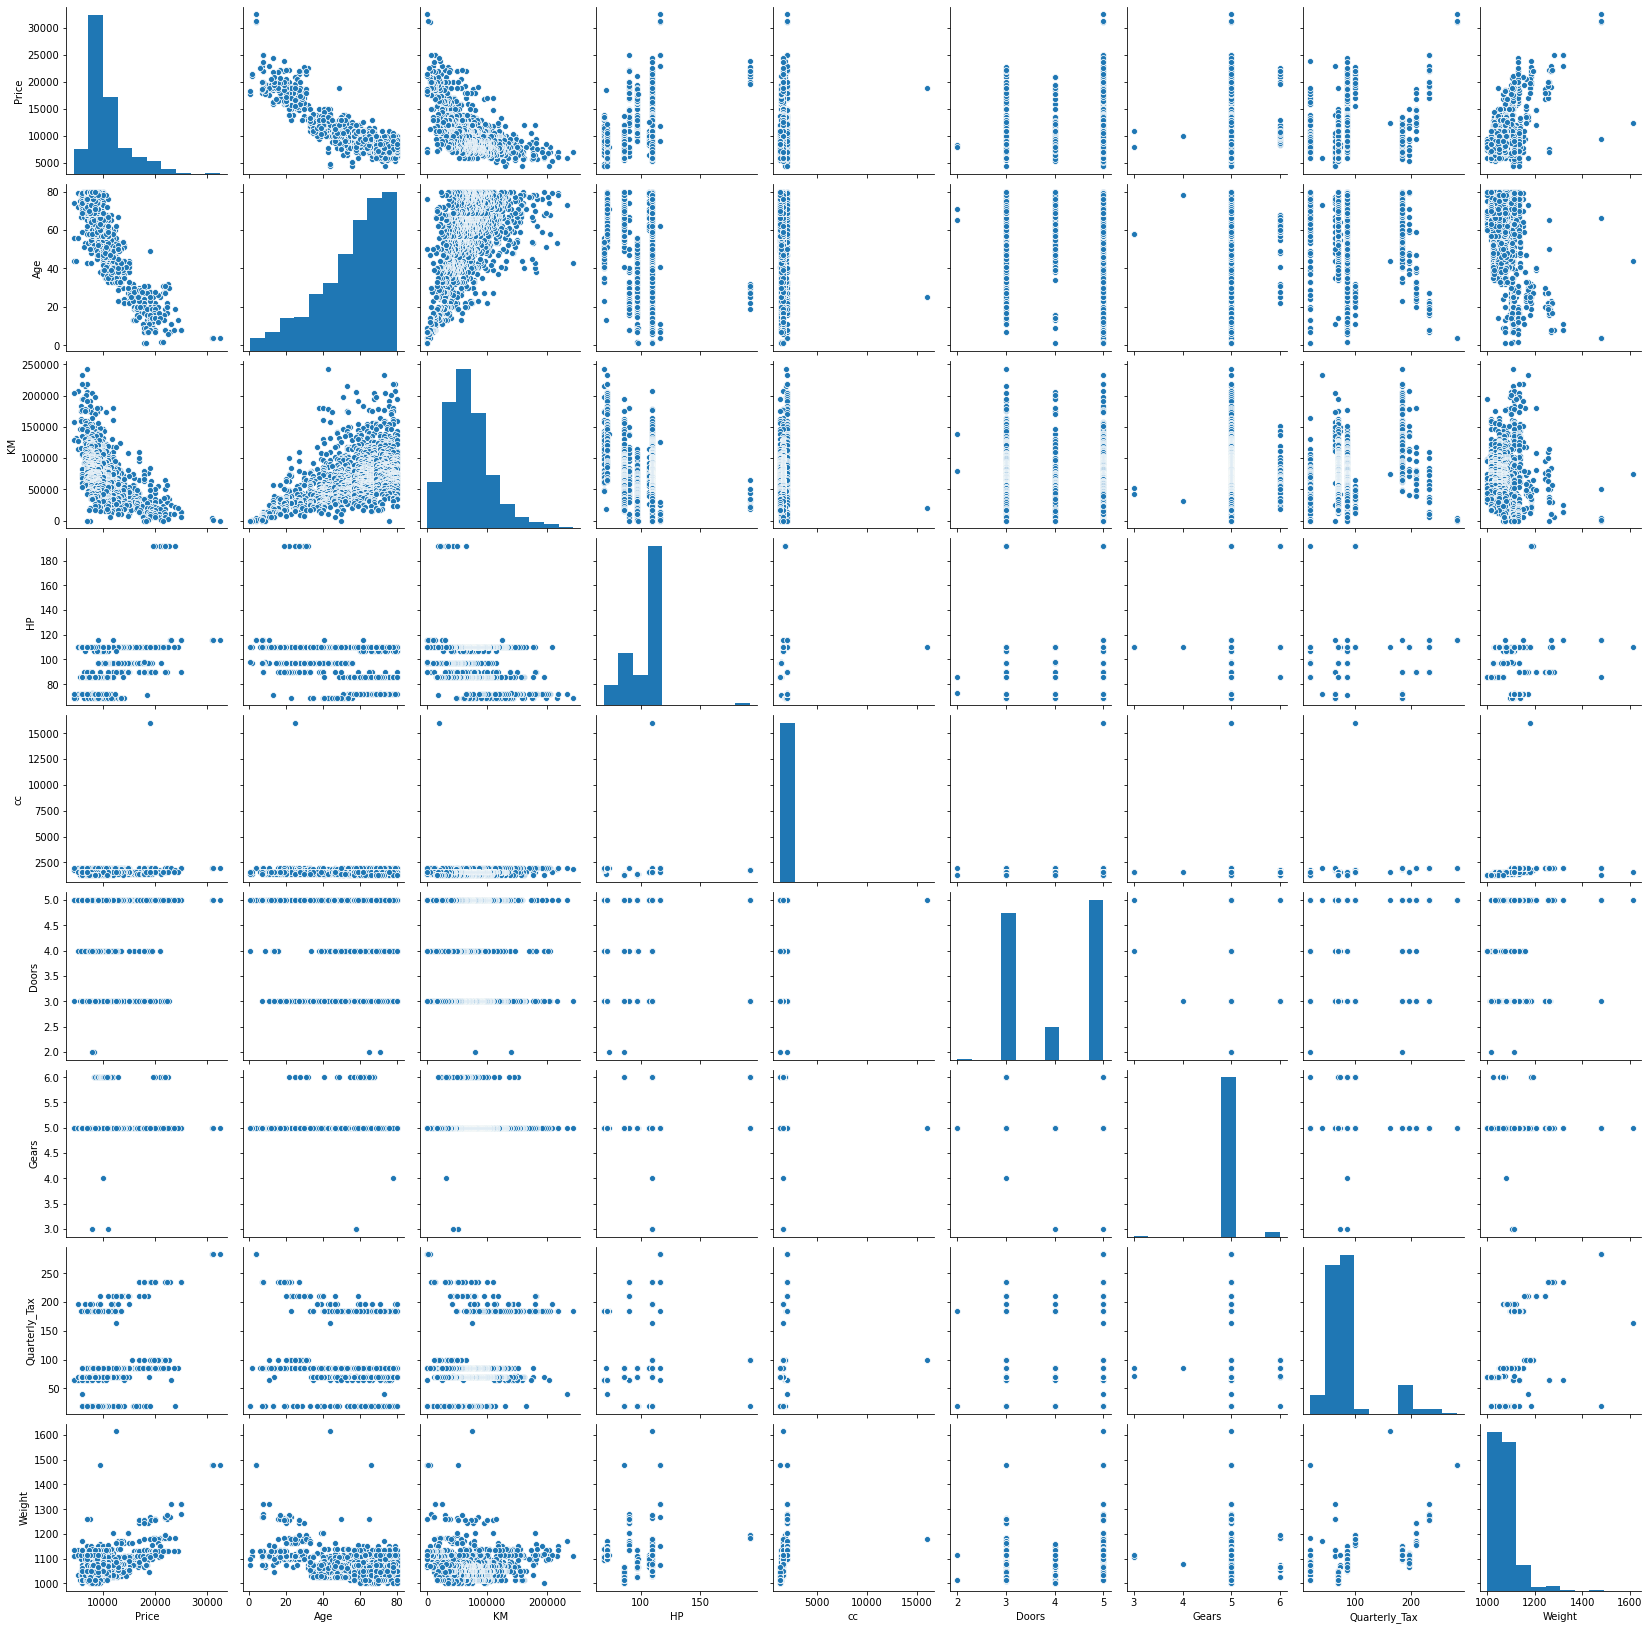

In [136]:
sns.pairplot(df2)

In [137]:
correlation_values= df2.corr()
correlation_values

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [138]:
import statsmodels.formula.api as smf
m1= smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= df2).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:27:18   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age            -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [139]:
m1_cc = smf.ols("Price~cc",data= df2).fit()
m1_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           1.55e-06
Time:                        13:27:19   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [140]:
m1_doors = smf.ols("Price~Doors", data= df2).fit()
m1_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           1.46e-12
Time:                        13:27:19   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
m1_to = smf.ols("Price~cc+Doors",data= df2).fit()
m1_to.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           1.15e-15
Time:                        13:27:19   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
cc             0.9597      0.221      4.340      0.000       0.526       1.393
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

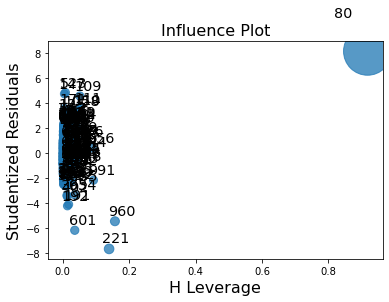

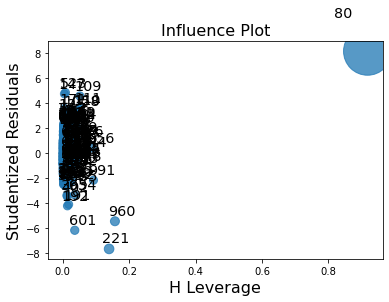

In [142]:
sm.graphics.influence_plot(m1)

In [154]:
df3= df2.drop(df2.index[[80]],axis=0)
m2= smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= df3).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:37:15   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age            -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM               -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP               39.3463      2.911     13.516      0.000      33.636      45.057
cc               -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors           -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears           523.9416    192.865      2.717      0.007     145.612     902.271
Quarterly_Tax     9.0440      1.425      6.348      0.000       6.249      11.839
Weight           20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [155]:
df4 = df2.drop(df2.index[[80,221]],axis=0)

In [156]:
m3= smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= df4).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1280.
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:37:26   Log-Likelihood:                -12278.
No. Observations:                1434   AIC:                         2.457e+04
Df Residuals:                    1425   BIC:                         2.462e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.025e+04   1395.733     -7.346      0.000    -1.3e+04   -7514.512
Age            -116.5783      2.508    -46.475      0.000    -121.499    -111.658
KM               -0.0173      0.001    -13.966      0.000      -0.020      -0.015
HP               39.2932      2.816     13.953      0.000      33.769      44.817
cc               -3.2057      0.305    -10.511      0.000      -3.804      -2.607
Doors           -65.3718     38.152     -1.713      0.087    -140.212       9.468
Gears           485.0462    186.602      2.599      0.009     119.001     851.091
Quarterly_Tax     7.9664      1.382      5.762      0.000       5.254      10.678
Weight           25.0494      1.186     21.129      0.000      22.724      27.375
==============================================================================
Omnibus:                      197.976   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1765.342
Skew:                          -0.317   Prob(JB):                         0.00
Kurtosis:                       8.399   Cond. No.                     3.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [158]:
df5= df2.drop(df2.index[[80,221,960]],axis=0)

In [159]:
m4= smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = df5).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:37:40   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age            -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP               36.6084      2.745     13.334      0.000      31.223      41.994
cc               -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears           464.9839    180.976      2.569      0.010     109.975     819.993
Quarterly_Tax     5.2134      1.371      3.802      0.000       2.523       7.904
Weight           30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [160]:
finalmodel = smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = df5).fit()
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:37:44   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age            -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP               36.6084      2.745     13.334      0.000      31.223      41.994
cc               -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears           464.9839    180.976      2.569      0.010     109.975     819.993
Quarterly_Tax     5.2134      1.371      3.802      0.000       2.523       7.904
Weight           30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [161]:
finalmodel_pred = finalmodel.predict(df5)

Text(0, 0.5, 'Predicted values')

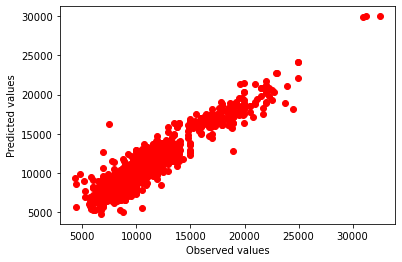

In [162]:
plt.scatter(df5["Price"],finalmodel_pred,c='r');plt.xlabel("Observed values");plt.ylabel("Predicted values")

Text(0, 0.5, 'Residuals')

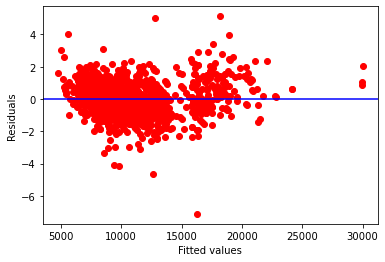

In [163]:
plt.scatter(finalmodel_pred, finalmodel.resid_pearson,c='r');plt.axhline(y=0,color='blue');plt.xlabel("Fitted values");plt.ylabel("Residuals")

(array([  1.,   0.,   3.,  16., 157., 723., 436.,  87.,   6.,   4.]),
 array([-7.11152315, -5.88819747, -4.6648718 , -3.44154612, -2.21822044,
        -0.99489476,  0.22843092,  1.4517566 ,  2.67508227,  3.89840795,
         5.12173363]),
 <a list of 10 Patch objects>)

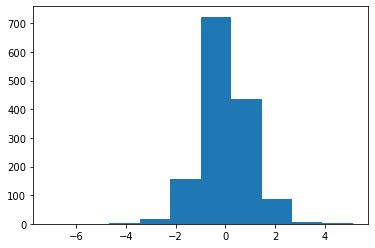

In [164]:
plt.hist(finalmodel.resid_pearson)

In [165]:
train_data,test_Data= train_test_split(df2,test_size=0.3)

In [166]:
finalmodel1 = smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = train_data).fit()
finalmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     784.8
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:37:58   Log-Likelihood:                -8647.4
No. Observations:                1005   AIC:                         1.731e+04
Df Residuals:                     996   BIC:                         1.736e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3107.3184   1636.415     -1.899      0.058   -6318.536     103.899
Age            -122.5935      3.146    -38.970      0.000    -128.767    -116.420
KM               -0.0207      0.002    -13.647      0.000      -0.024      -0.018
HP               31.9735      3.229      9.902      0.000      25.637      38.310
cc               -0.0393      0.090     -0.437      0.662      -0.216       0.137
Doors           -48.7132     47.316     -1.030      0.303    -141.564      44.138
Gears           502.7129    237.331      2.118      0.034      36.987     968.439
Quarterly_Tax     4.7831      1.486      3.219      0.001       1.867       7.699
Weight           15.0941      1.218     12.391      0.000      12.704      17.485
==============================================================================
Omnibus:                       91.826   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              568.116
Skew:                          -0.030   Prob(JB):                    4.32e-124
Kurtosis:                       6.683   Cond. No.                     3.06e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [167]:
finalmodel_pred = finalmodel1.predict(train_data)

In [169]:
finalmodel_res = train_data["Price"]-finalmodel_pred

In [170]:
finalmodel_rmse = np.sqrt(np.mean(finalmodel_res*finalmodel_res))
finalmodel_rmse

1320.0867116407371

In [171]:
finalmodel_testpred = finalmodel1.predict(test_Data)

In [172]:
finalmodel_testres= test_Data["Price"]-finalmodel_testpred

In [173]:
finalmodel_testrmse = np.sqrt(np.mean(finalmodel_testres*finalmodel_testres))
finalmodel_testrmse

1390.8064429332394